In [1]:
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt
%matplotlib inline

In [195]:
class box():
    def __init__(self, points, x0, y0, z0, xs, ys, zs):
        self.points = points
        
        self.x0 = x0
        self.x1 = x0 + xs
        self.y0 = y0
        self.y1 = y0 + ys
        self.z0 = z0
        self.z1 = z0 + ys
        self.xs = 0.5*xs
        self.ys = 0.5*ys
        self.zs = 0.5*zs
        self.xh = x0 + 0.5*xs
        self.yh = y0 + 0.5*ys
        self.zh = z0 + 0.5*zs
        self.tx = x0, self.xh
        self.ty = y0, self.yh
        self.tz = z0, self.zh
        self.inter = []
        self.children = np.zeros((2, 2, 2), dtype=box)
        check = self.checksons()
        print(self.inter)
        if check:
            self.assign()

    def assign(self):
        for i in range(8):
            j, k, l = i%2, int(i/2)%2, int(i/4)
            pos = self.inter[i]
            x = self.points[0][pos]
            y = self.points[1][pos]
            z = self.points[2][pos]
            self.children[j, k, l] = box([x, y, z], self.tx[j], self.ty[k], self.tz[l], self.xs, self.ys, self.zs) 
        
    def checksons(self):
        xh = np.where(self.xh >= self.points[0])[0]
        xl = np.where(self.xh < self.points[0])[0]
        yh = np.where(self.yh >= self.points[1])[0]
        yl = np.where(self.yh < self.points[1])[0]
        zh = np.where(self.yh >= self.points[2])[0]
        zl = np.where(self.yh < self.points[2])[0]
        ans = [xh, xl, yh, yl, zh, zl]
        
        self.inter.append(np.intersect1d(np.intersect1d(xl, yl), zl))
        self.inter.append(np.intersect1d(np.intersect1d(xh, yl), zl))
        self.inter.append(np.intersect1d(np.intersect1d(xl, yh), zl))
        self.inter.append(np.intersect1d(np.intersect1d(xh, yh), zl))
        self.inter.append(np.intersect1d(np.intersect1d(xl, yl), zh))
        self.inter.append(np.intersect1d(np.intersect1d(xh, yl), zh))
        self.inter.append(np.intersect1d(np.intersect1d(xl, yh), zh))
        self.inter.append(np.intersect1d(np.intersect1d(xh, yh), zh))
        for pos in ans:
            if len(pos) > 1:
                return True

In [196]:
N = 30
x = 2 - random(N)
y = 2 - random(N)
z = 2 - random(N)
data = [x, y, z]
a = box(data, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)
a.assign()

[array([ 6,  9, 10, 13, 16]), array([ 0, 19, 20, 22, 23, 26]), array([ 8, 14, 17, 24]), array([ 2,  3, 21]), array([25]), array([ 4,  5, 11, 18, 29]), array([ 1, 15, 27]), array([ 7, 12, 28])]
[array([0, 1, 2, 3, 4]), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64)]
[array([0, 1, 2, 3, 4]), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64)]
[array([0, 1, 2, 3, 4]), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64)]
[array([0, 1, 2, 3, 4]), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64)]
[array([0, 1, 2, 3, 4]), array([], 

RuntimeError: maximum recursion depth exceeded in comparison

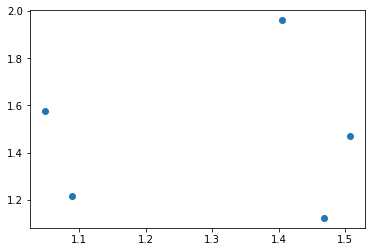

In [199]:
plt.plot(x[[0, 1, 2, 3, 4]], y[[0, 1, 2, 3, 4]], "o")